# Is Miami A Place to Call Home?

Benjamin Horton and Guiv Hakimi

# Introduction
As we approach the end of our college years and start thinking about our lives in the real world, we have started doing some research on what cities would be most desirable to kick start our tech careers. One of the locations that we have been drawn to that seems ALMOST perfect is, Miami, Florida. 

As per a Forbes article in 2019, "Miami is rising as a tech hub." The continued increase in new startups, tech companies, and fintech organizations is bringing Miami to the forefront of the tech scene. Additionally, the Miami Mayor, Francis Suarez, has been very active in making Miami a new financial capital and as told by The New York Times, “Mayor Francis Suarez is selling his city as the world’s cryptocurrency capital.” As such, Miami would be a great location for computer science graduates who are looking for opportunities to get involved in the crypto industry.
The growth of the tech community, along with the relatively low cost of living compared to some of the other major cities such as New York, and a great balance of city and ocean views, make Miami an almost perfect place for us to move to after college.

However, Miami has one big variable that may be the determining factor of whether or not we want to live in Miami. That is the Miami climate. Miami is known for having some intense seasons and is classified as having a tropical monsoon climate. As such, we decided to analyze the Miami climate in order to gain more insight into not only what the weather trends in Miami are, but also to see if the climate will get worse in the future. If we consider Miami as a place to start a career, knowing how the climate will progress will be very valuable. 

We hypothesize that as a result of the effects of climate change, Miami’s climate has gotten worse and will continue to get worse. 

https://www.nytimes.com/2021/03/23/business/dealbook/miami-suarez-crypto.html
https://www.forbes.com/sites/elizabethmacbride/2019/09/03/miami-is-rising-as-a-tech-hub-with-some-surprising-help/?sh=99f8f105fd7e

## Importing Libraries

To begin the Data Science Pipeline process we must first import any libraries we may find necessary to complete the collection, processing, analysis, and hypothesis testing of the desired dataset. Most of these libraries involve the collection and manipulation of the data and others are more for the aesthetics of the analysis.

### Library and Package Descriptions

Numpy - 
Python library used for working with arrays, but also has functions for working in the domain of linear algebra and basic mathematics.

Pandas - 
Python library used for curating data by converting it into a dataframe format and using its functions to manipulate data.

matplotlib.pyplot - 
Python library used to create and manipulate different types of plots using a dataframe.

re - 
Python library used to evaluate input through regular expressions.

requests - 
Python library used to request data from webpages and inspect elements that the user extracts.

BeautifulSoup - 
Python package used to parse HTML and XML documents. In this case we will be using it for HTML.

defaultdict - 
Python container that is a subclass of Dict which returns an object similar to the dictionary data structure.

figure - 
Another python container that helps in the process of resizing different graphics and figures throughout the tutorial.

seaborn - 
Python data visualization library that provides an interface for drawing aesthetically pleasing and informative graphics.

statsmodels.api - 
Python library that helps summarize analytics data from previously computed data.

warnings - 
Python library used to manipulate possible warnings (in this case used to suppress some future warnings that may be encountered later in the tutorial). Must be used ONLY when you are well aware of the reason for the warning otherwise your code may have unexpected outcomes.

sklearn:  
Each of the containers imported from this library serve a different purpose, but they all lie in the realm of hypothesis testing and will be explained sequentially when they are first used.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import requests
from bs4 import BeautifulSoup
from collections import defaultdict
from matplotlib.pyplot import figure
import seaborn as sns
import statsmodels.api as sm
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Data Collection
Through Github, we were able to find a public dataset that has data for the Miami Climate from 1973 to 2021 as reported by Miami International Airport (which is located in the city of Miami). The data contains various different columns which are stated below. Next to the description of the variable, we have stated a short label which we will use to label the data points for simplicity and brevity. 

T - 
Average annual temperature - Temp

TM - 
Annual average maximum temperature - Max_Temp

Tm - 
Average annual minimum temperature - Min_Temp

PP - 
Rain or snow precipitation total annual - Precipitation

V - 
Annual average wind speed - Wind_Speed

RA - 
Number of days with rain - DaysWithRain

SN - 
Number of days with snow - DaysWithSnow

TS - 
Number of days with storm - DaysWithStorm

FG - 
Number of foggy days - DaysWithFog

TN -
Number of days with tornado -  DaysWithTornado

GR - 
Number of days with hail - DaysWithHail


Webpage: 
https://en.tutiempo.net/climate/ws-722020.html

### Requesting Content from the Webpage

The following lines of code retrieve the HTML file from the website and find the targetted table using the requests library and BeautifulSoup package. For more information about how to use BeautifulSoup to parse data you can visit:

https://realpython.com/beautiful-soup-web-scraper-python/
https://programminghistorian.org/en/lessons/intro-to-beautiful-soup#using-beautifulsoup-to-select-particular-content

In [2]:
r = requests.get('https://en.tutiempo.net/climate/ws-722020.html')
root = BeautifulSoup(r.content)
# Finding the correct HTML Table which contains the desired weather data by pointing out one of it's attributes. 
table = root.select_one('table:contains("T")')

Above we have collected and organized the HTML retrieved from the webpage and stored the table in our table variable as HTML as well. Below we will create a new table with desired names for columns (for simplicity and uniformity) then parse through the HTML, copying the data into the correct cell in our newly defined table. 

In [3]:
# Creating a dataframe/table with better column names for easier understanding
cols = ['Year','Temp','Max_Temp','Min_Temp','Precipitation','Wind_Speed','DaysWithRain','DaysWithSnow','DaysWithStorm', 'DaysWithFog', 'DaysWithTornado', 'DaysWithHail']
my_table = pd.DataFrame(columns = cols, index = range(1,51))

The website from which we requested our data was not set up in a format to directly import the data as a csv or any other simple form so we first had to organize it in a way so that it could be easily interpretted.

In [4]:
# Parsing through the HTML table and inputting the data into our table that was defined above
row_counter = 0

for row in table.find_all('tr'):
    col_counter = 0
    columns = row.find_all('td')
    
    for col in columns:
        my_table.iat[row_counter,col_counter] = col.get_text()
        col_counter += 1
        
    row_counter += 1

# Dropping the empty rows    
my_table.drop(labels=[1], axis=0, inplace=True)
my_table.drop(labels=[50], axis=0, inplace=True)
my_table

,Year,Temp,Max_Temp,Min_Temp,Precipitation,Wind_Speed,DaysWithRain,DaysWithSnow,DaysWithStorm,DaysWithFog,DaysWithTornado,DaysWithHail
2,1973,24.4,28.1,21.0,-,14.7,161,2,75,33,1,1
3,1974,25.1,29.2,21.1,-,15.9,154,1,70,30,1,0
4,1975,24.9,29.0,20.9,-,15.6,156,0,87,29,0,0
5,1976,24.1,28.1,20.0,-,15.8,154,1,66,40,1,1
6,1977,24.2,28.3,20.0,1938.75,15.4,146,0,50,38,0,0
7,1978,24.1,28.2,20.2,1228.01,15.5,172,0,68,60,0,0
8,1979,24.2,28.4,20.3,1504.29,17.1,154,1,53,42,0,2
9,1980,24.2,28.8,20.0,1463.29,14.8,158,0,84,62,0,0
10,1981,24.1,29.3,19.2,1378.73,16.4,155,0,83,53,0,0
11,1982,25.1,29.5,20.8,1592.58,14.7,186,0,76,48,1,0


### Cleaning the Data

In order for us to make computations using the data we have just retrieved, a few things must happen first. Since we will be be making all numerical computations on the data we need to get rid of any instances of missing data wherever they may occur. The most important instance of this is in the cases of a few of the years in our dataset which completely lack any data.

In [5]:
# Making a copy of our original dataset in case we want to use it later on
original_table = my_table.copy()
# The only rows that are completely empty were those that did not have a max temperature on file so we will drop those
my_table = my_table[my_table.Max_Temp != '-']
# Saving a copy of our newly cleaned data to a new variable then verifying the output
my_editted_table = my_table.copy()
my_editted_table

,Year,Temp,Max_Temp,Min_Temp,Precipitation,Wind_Speed,DaysWithRain,DaysWithSnow,DaysWithStorm,DaysWithFog,DaysWithTornado,DaysWithHail
2,1973,24.4,28.1,21.0,-,14.7,161,2,75,33,1,1
3,1974,25.1,29.2,21.1,-,15.9,154,1,70,30,1,0
4,1975,24.9,29.0,20.9,-,15.6,156,0,87,29,0,0
5,1976,24.1,28.1,20.0,-,15.8,154,1,66,40,1,1
6,1977,24.2,28.3,20.0,1938.75,15.4,146,0,50,38,0,0
7,1978,24.1,28.2,20.2,1228.01,15.5,172,0,68,60,0,0
8,1979,24.2,28.4,20.3,1504.29,17.1,154,1,53,42,0,2
9,1980,24.2,28.8,20.0,1463.29,14.8,158,0,84,62,0,0
10,1981,24.1,29.3,19.2,1378.73,16.4,155,0,83,53,0,0
11,1982,25.1,29.5,20.8,1592.58,14.7,186,0,76,48,1,0


We noticed that there is still some missing data, but to preserve the accuracy of our analysis of variables excluding precipitation we will leave them as is. This way we can preserve the size of data we are working with at the moment. 

# Data Analysis & Visualisation

Now we will organize the data and display it such that it offers some valuable information. We have created the tables and the names and we will proceed with organizing the target column to ensure no missing data in our plots and that it is all in a usable format. We will plot some of the important columns so that we can find potential trends that will lead us closer to proving or rejecting our hypothesis and understanding if the climate in Miami has changed since 1973. 

Text(0, 0.5, 'Temperature (Celsius)')

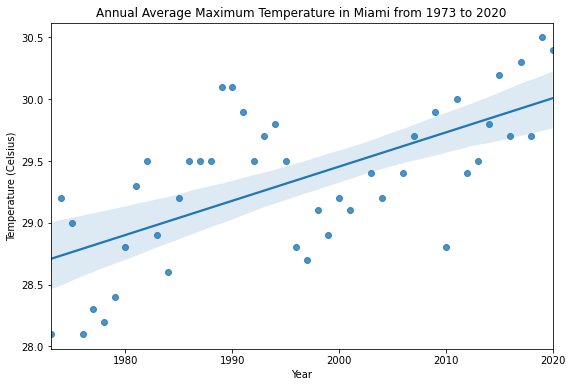

In [6]:
# Adjusting the size of the figure for easier readability
plt.figure(figsize=(9,6))

# Changing the data we'd like to look at from object to float so that all computations are compatible and accurate
my_editted_table["Year"] = pd.to_numeric(my_editted_table["Year"])
my_editted_table["Max_Temp"] = pd.to_numeric(my_editted_table["Max_Temp"])
my_editted_table["Temp"] = pd.to_numeric(my_editted_table["Temp"])
my_editted_table["Min_Temp"] = pd.to_numeric(my_editted_table["Min_Temp"])
my_editted_table["Wind_Speed"] = pd.to_numeric(my_editted_table["Wind_Speed"])
my_editted_table["DaysWithRain"] = pd.to_numeric(my_editted_table["DaysWithRain"])
my_editted_table["DaysWithSnow"] = pd.to_numeric(my_editted_table["DaysWithSnow"])
my_editted_table["DaysWithStorm"] = pd.to_numeric(my_editted_table["DaysWithStorm"])
my_editted_table["DaysWithFog"] = pd.to_numeric(my_editted_table["DaysWithFog"])
my_editted_table["DaysWithTornado"] = pd.to_numeric(my_editted_table["DaysWithTornado"])
my_editted_table["DaysWithHail"] = pd.to_numeric(my_editted_table["DaysWithHail"])

# Printing and labeling our regression plot of the annual average maximum temperature over time
sns.regplot(x=my_editted_table["Year"], y=my_editted_table["Max_Temp"])
plt.title("Annual Average Maximum Temperature in Miami from 1973 to 2020")
plt.xlabel("Year")
plt.ylabel("Temperature (Celsius)")

Above we have plotted a scatter plot with a regression line of the annual average maximum temperature as it has progressed from 1973 up until 2020. There is a very clear increasing slope which shows us that the annual maximum temperature in Miami has been increasing over the past 47 years, on average. 

Text(0, 0.5, 'Temperature (Celsius)')

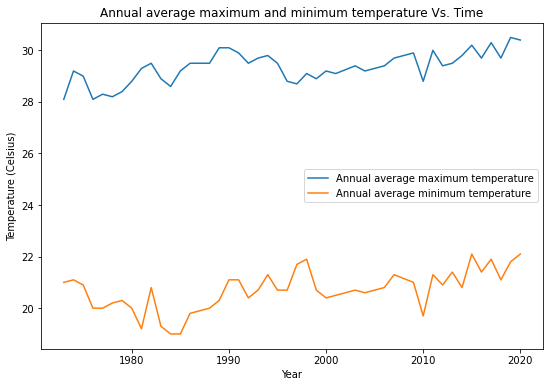

In [7]:
plt.figure(figsize=(9,6))

# Plotting the annual average maximum temperature as well as the minimum over time
sns.lineplot(x=my_editted_table['Year'], y=my_editted_table['Max_Temp'], ci = None)
sns.lineplot(x=my_editted_table['Year'], y=my_editted_table['Min_Temp'], ci = None)
plt.legend(["Annual average maximum temperature", "Annual average minimum temperature"])
plt.title("Annual average maximum and minimum temperature Vs. Time")
plt.xlabel("Year")
plt.ylabel("Temperature (Celsius)")

As detailed by the graph above, both the annual average maximum and minimum temperatures in Miami have been on the increase since 1973 (Blue is the maximum and orange is the minimum). So we can see that the temperatures in Miami have been increasing. So lets look at some other variables now. 

Text(0, 0.5, 'Number of Days With Storm')

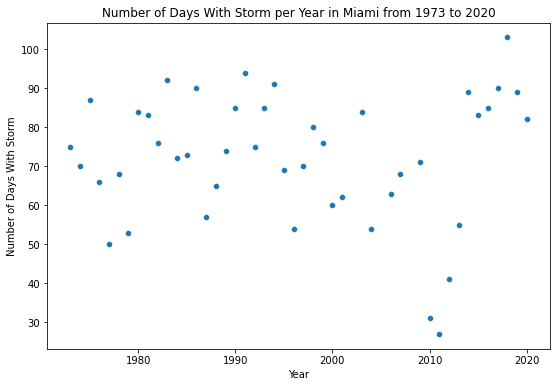

In [8]:
plt.figure(figsize=(9,6))

sns.scatterplot(x=my_editted_table["Year"], y=my_editted_table["DaysWithStorm"])
plt.title("Number of Days With Storm per Year in Miami from 1973 to 2020")
plt.xlabel("Year")
plt.ylabel("Number of Days With Storm")

Despite the clear trends in regards to temperature, it based on the scatter plot above, there does not seem to be a very compelling trend for the number of days with storm per year in Miami. Let's investigate further. 

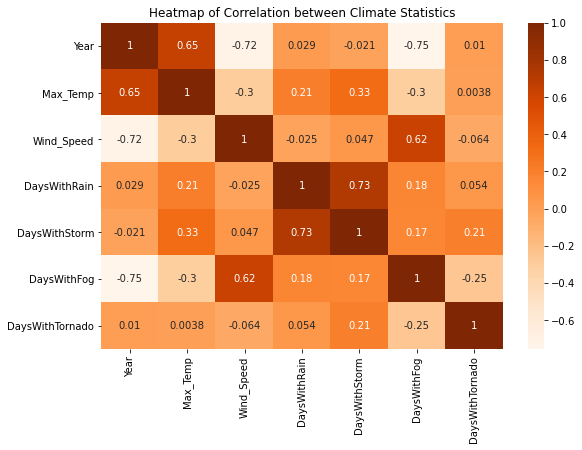

In [9]:
plt.figure(figsize=(9,6))

# Dropping columns that we can already see would be relatively irrelevant to our correlation analysis
table = my_editted_table.drop(['Temp', 'Min_Temp', 'Precipitation', 'DaysWithSnow', 'DaysWithHail'], axis = 1, inplace =False)

# Using a heatmap to effectively visualize the variables that show the most potential for correlation
sns.heatmap(table.corr(), annot=True, cmap='Oranges')
plt.title('Heatmap of Correlation between Climate Statistics')
plt.show()

When examining the heatmap you can see a very clear and relatively strong positive correlation between the years and the average annual max temperature in Miami which we plan to investigate further later on in the tutorial. However, there is another correlation that is even which is the days with storm and days with rain. This is to be expected because in most cases places with a tropical environment such as Miami will have rain if they are experiencing a storm. Another interesting observation is the negative correlation between the year and days with fog as well as the wind speed as both of those dependent variables seem as if they would be much more arbitrary.

Text(0, 0.5, 'Rain or snow precipitation')

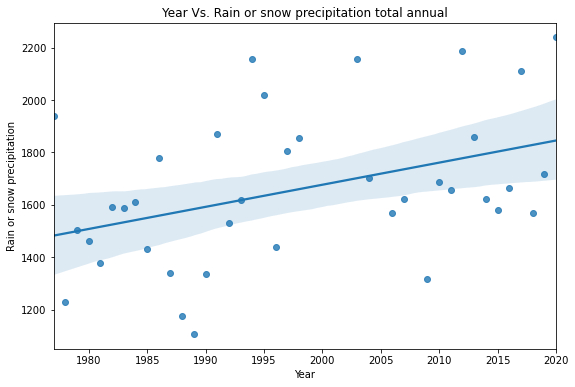

In [10]:
# Copying the edditted table to preserve the reference
precipitation_table = my_editted_table.copy()
# Dropping the rows with missing values from our table which we'd like to use for precipitation data
precipitation_table = precipitation_table[precipitation_table.Precipitation != '-']
# Converting from object to float
precipitation_table["Precipitation"] = pd.to_numeric(precipitation_table["Precipitation"])
plt.figure(figsize=(9,6))
# Generating a regression plot of the association between year and annual precipitation totals
sns.regplot(x=precipitation_table['Year'], y=precipitation_table['Precipitation'])
plt.title("Year Vs. Rain or snow precipitation total annual")
plt.xlabel("Year")
plt.ylabel("Rain or snow precipitation")

Again, we see a moderate positive correlation between the year and precipitation totals in Miami as shown through observation of the regression line.

### Deeper Observation

As we move deeper into the analysis of these data visualizations it is clear to see the presence of a positive association between the independent year variable and the max temperature and precipitation dependent variables, respectively. This shows that the climate in Miami has indeed changed over the past several years and has progressively been getting worse since 1973. It is clear from the plots and graphs above that Miami has both been getting hotter every year, and has been getting more percipitation over the years. 

As a result of this observation, it seemed warranted to delve deeper into the regression statistics to see if there is in fact a statistically significant association. First, we will look at the regression results for the year and max annual average temperature, followed by the results of the year and precipitation totals.


For more information on the Seaborn(sns) Plots visit: 
https://seaborn.pydata.org/introduction.html

For information about Matplotlib visit: 
https://matplotlib.org/

# Hypothesis Testing & Machine Learning

In this section of the tutorial, we will walk through the procedures in which one could test the data that they have collected to see if there is in fact a statistically significant relationship between the independent and dependent variables of the dataset. To start, let us gather the regression results from the year and max temperature columns.

In [11]:
# Independent predictor variable column
X = table['Year']
# Dependent Variable column
y = table['Max_Temp']
model = sm.OLS(y,X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Max_Temp   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.551e+05
Date:                Mon, 17 May 2021   Prob (F-statistic):                    1.09e-79
Time:                        17:44:25   Log-Likelihood:                         -32.137
No. Observations:                  45   AIC:                                      66.27
Df Residuals:                      44   BIC:                                      68.08
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year           0.0147   3.73e-05    393.850      0.000       0.015       0.015
==============================================================================
Omnibus:                        2.554   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.279   Jarque-Bera (JB):                1.572
Skew:                          -0.188   Prob(JB):                        0.456
Kurtosis:                       2.165   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Year vs Max Temperature:

R^2 = 1.000

P>|t| = 0.00

The R^2 value tells us that 100% of the observed variation for max temperature can be explained by the year, which means there must be an issue with the predicting model because this is an extremely rare occurence.

The P>|t| indicates that there is a statistically significant relationship between the year and max temperature.

In [12]:
# Independent predictor variable column
X = precipitation_table['Year']
# Dependent variable column
y = precipitation_table['Precipitation']
model = sm.OLS(y,X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Precipitation   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1317.
Date:                Mon, 17 May 2021   Prob (F-statistic):                    1.57e-30
Time:                        17:44:25   Log-Likelihood:                         -267.78
No. Observations:                  38   AIC:                                      537.6
Df Residuals:                      37   BIC:                                      539.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year           0.8304      0.023     36.294      0.000       0.784       0.877
==============================================================================
Omnibus:                        0.897   Durbin-Watson:                   1.377
Prob(Omnibus):                  0.639   Jarque-Bera (JB):                0.949
Skew:                           0.308   Prob(JB):                        0.622
Kurtosis:                       2.531   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Year vs Precipitation:

R^2 = 0.973

P>|t| = 0.00

The R^2 value tells us that 97.3% of the observed variation for precipitation can be associated with the year.

The P>|t| indicates that there is a statistically significant relationship between the year and precipitation.

## Machine Learning Algorithms

As a result of the small size of this dataset, we have been working with, a train-test split procedure for determining a prediction of Miami's future weather/climate is not going to be the most effective way of going through our hypothesis testing and creating a machine learning algorithm. With that being said, it is a very important algorithm to be familiar with when going through the data science pipeline so we have given an example below of the steps you would take to perform it in this case:

In [13]:
# Data column that we'd like to use to train the algorithm and make predictions
important_data = ['Year']
y = precipitation_table['Max_Temp']
X = precipitation_table[important_data]

In [14]:
# Test data size in proportion to the dataset
test_size = .4
# Starting index value for training to preserve randomness
seed = 15
# Using the train_test_split algorithm to generate training and testing values with which to make predictions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [15]:
# Verifying the size to make sure we have the correct dataframe
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22, 1), (16, 1), (22,), (16,))

In [16]:
# Instantiating the Linear Regression model
lr = LinearRegression()
# Fitting the model 
lr.fit(X_train, y_train)
# Predicting the target value for the model based off the random samples
y_test_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)
# Computing the accuracy of the model's performance
acc_train_lr = lr.score(X_train, y_train)
acc_test_lr = lr.score(X_test, y_test)
# Computing the root mean squared error
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_lr))

print("Accuracy of Training Data: {:.3f}".format(acc_train_lr))
print("Accuracy of Test Data: {:.3f}".format(acc_test_lr))
print('Mean Squared Error of Training Set:', rmse_train_lr)
print('Mean Squared Error of Testing Set:', rmse_test_lr)

Accuracy of Training Data: 0.292
Accuracy of Test Data: 0.313
Mean Squared Error of Training Set: 0.45419965320549277
Mean Squared Error of Testing Set: 0.48826988685858436


The accuracy of both the training and test data is reasonably low, at ~0.3 which is equivalent to ~30%, so it can be concluded that this model does not accurately depict the predictions for this dataset. Our mean squared error coefficients, however, are very similar so we can conclude that the data is being under fitted and possibly with more data we could prove a statistical significance. Despite this, with the data available to us, such conclusions can not be made.

For the sake of information, it is important to note that one can also track the performance of the model through the analysis of the residuals plot which is used below. Residuals are made to show the difference between the expected values and what is actual shown by the model. For more information about how residuals can help to analyze a dataset here's a broad overview:

https://www.statisticshowto.com/residual/

Text(0.5, 1.0, 'Residuals')

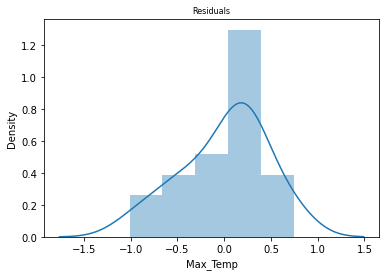

In [17]:
# Suppressing a future warning because python may be phasing out the use of this plot as it updates
# A similar version of this plot is accessible using the "displot()" function and the same arguments from the seaborn library
warnings.simplefilter(action='ignore', category=FutureWarning)

y_hat = lr.predict(X_train)
# Creating residuals plot using difference between expected and predicted values
sns.distplot(y_train - y_hat)
plt.title("Residuals", size=8)

In [18]:
# Instantiating the DecisionTreeRegressor model 
dt = DecisionTreeRegressor()

# Fitting the model 
dt.fit(X_train, y_train)

# Predicting the target value for the model based off the random samples
y_test_dt = dt.predict(X_test)
y_train_dt = dt.predict(X_train)

# Computing the accuracy of the model's performance
acc_train_dt = dt.score(X_train, y_train)
acc_test_dt = dt.score(X_test, y_test)

# Computing root mean squared error
rmse_train_dt = np.sqrt(mean_squared_error(y_train, y_train_dt))
rmse_test_dt = np.sqrt(mean_squared_error(y_test, y_test_dt))

print("DT: Accuracy of Training Data: {:.3f}".format(acc_train_dt))
print("DT: Accuracy of Test Data: {:.3f}".format(acc_test_dt))
print('DT: Mean Squared Error of Training Set:', rmse_train_dt)
print('DT: Mean Squared Error of Testing Set:', rmse_test_dt)

DT: Accuracy of Training Data: 1.000
DT: Accuracy of Test Data: 0.249
DT: Mean Squared Error of Training Set: 0.0
DT: Mean Squared Error of Testing Set: 0.5105144464165535


This model shows that the training data is nearing an accuracy of 100% using the test specified by the decision tree regressor, yet the test data is even less accurate now. As well, the mean squared error coefficients are vastly different, so by conclusion, we can say that more data and information is most likely required to be able to reject the null hypothesis that Miami's weather will be getting worse as the years go on.

For more information visit: 
https://scikit-learn.org/stable/

# Conclusion

Based on tech job opportunities and future promises, Miami seems like a great place to start a career. However, we had a big concern in regards to life in Miami: The Weather. As such, in this tutorial, we decided to analyze the weather trends in Miami in order to gain more insight to help us with our big decision. 

From our data visualization section, it was very apparent that the weather in Miami is indeed changing. Through our data representations, we were able to see that the temperatures in Miami have been rising fairly consistently from 1973-2020. Additionally, with the help of the regression line, we were able to find that the precipitation in Miami has also been increasing since 1973. As such, we can say that the weather in Miami has gotten worse from 1973-2020. 

We used a Linear Regression model and a Decision Tree model to test our hypothesis that the weather in Miami would be getting worse in the future. This was done by using the models to predict future weather trends such as temperature and precipitation for years to come. We were slightly successful, however, we realized that more data would be needed for a more accurate prediction of Miami’s temperatures and precipitation. Unfortunately, due to limited time and resources, we were unable to find a larger dataset that included Miami's weather trends in order to perfect our prediction. However, if it weren't for the time limit, this is how we would proceed with our analysis of the weather trends and even a more general analysis of the living situation in Miami: 

First, we would search the web and https://www.kaggle.com/ (a large online repository consisting of many different downloadable datasets in different fields). 

Then, if needed, we would scrape the web and use beautiful soup in order to extract the desired data. I have linked some resources to help with that below.

https://realpython.com/beautiful-soup-web-scraper-python/

https://www.freecodecamp.org/news/web-scraping-python-tutorial-how-to-scrape-data-from-a-website/

In regards to the prediction model, once we have found more data, we would format that data in a very similar way to the above and run the model again. We would do this in order to get an increase in the accuracy of our prediction.

Below are some resources to learn machine learning and deep learning in Python using various different Python tools such as Sklearn, Pytorch, and TensorFlow. Given a more comprehensive dataset, the resources below can provide some useful tools and knowledge in using machine learning to analyze data. 

https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

https://scikit-learn.org/stable/

https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

